In [2]:
import requests
import csv
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv'
r = requests.get(url, allow_redirects=True)
open('downloaded.csv', 'wb').write(r.content)
df = pd.read_csv('downloaded.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df['YearUsed'] = df['YrSold'] - df['YearBuilt']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearUsed
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,8


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.shape

(2919, 82)

In [7]:
df1 = pd.DataFrame(columns = ['Street','SalePrice','LotArea','YearUsed'], data = df)
df1

,Street,SalePrice,LotArea,YearUsed
0,Pave,208500.0,8450,5
1,Pave,181500.0,9600,31
2,Pave,223500.0,11250,7
3,Pave,140000.0,9550,91
4,Pave,250000.0,14260,8
...,...,...,...,...
2914,Pave,NaN,1936,36
2915,Pave,NaN,1894,36
2916,Pave,NaN,20000,46
2917,Pave,NaN,10441,14


In [8]:
df1 = df1.dropna(how='any',axis=0)
df1

,Street,SalePrice,LotArea,YearUsed
0,Pave,208500.0,8450,5
1,Pave,181500.0,9600,31
2,Pave,223500.0,11250,7
3,Pave,140000.0,9550,91
4,Pave,250000.0,14260,8
...,...,...,...,...
1455,Pave,175000.0,7917,8
1456,Pave,210000.0,13175,32
1457,Pave,266500.0,9042,69
1458,Pave,142125.0,9717,60


In [9]:
df1.groupby('Street').describe()

SalePrice                                                            \
           count           mean           std      min       25%       50%   
Street                                                                       
Grvl         6.0  130190.500000  65446.253991  55993.0   88250.0  114250.0   
Pave      1454.0  181130.538514  79446.597317  34900.0  130000.0  163000.0   

                           LotArea                ...                      \
             75%       max   count          mean  ...       75%       max   
Street                                            ...                       
Grvl    169650.0  228950.0     6.0  41136.333333  ...  30849.75  164660.0   
Pave    214000.0  755000.0  1454.0  10390.475241  ...  11596.00  215245.0   

       YearUsed                                                         
          count       mean        std   min    25%   50%    75%    max  
Street                                                                  
Grvl        6.0  47.000000  18.558017  17.0  43.25  45.5  55.25   73.0  
Pave     1454.0  36.504814  30.285513   0.0   7.25  35.0  54.00  136.0  

[2 rows x 24 columns]

In [10]:
# Choose the midian 50% data, to avoid extreme conditions
df1_Pave = df1.loc[df1['Street'] == 'Pave']
df1_Pave = df1_Pave.loc[df1_Pave['LotArea'] < 11596]
df1_Pave = df1_Pave.loc[df1_Pave['LotArea'] > 7536.25]
df1_Pave = df1_Pave.loc[df1_Pave['YearUsed'] < 54]
df1_Pave = df1_Pave.loc[df1_Pave['YearUsed'] > 35]

In [11]:
df1_Pave

,Street,SalePrice,LotArea,YearUsed
7,Pave,200000.0,10382,36
10,Pave,129500.0,11200,43
14,Pave,157000.0,10920,48
16,Pave,149000.0,11241,40
17,Pave,90000.0,10791,39
...,...,...,...,...
1425,Pave,142000.0,10721,49
1435,Pave,174000.0,8400,46
1436,Pave,120500.0,9000,36
1445,Pave,129000.0,8400,41


In [12]:
from scipy.stats import normaltest
normaltest(df1_Pave['SalePrice'])

NormaltestResult(statistic=26.652311584400945, pvalue=1.6312633333617312e-06)

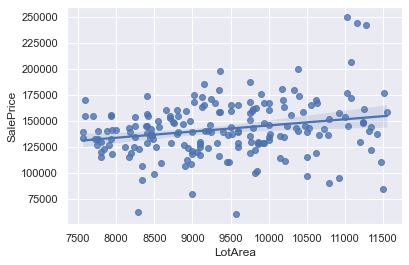

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

plt.figure()
sns.regplot(x='LotArea', y='SalePrice', data=df1_Pave, color='b',order=1.5)
plt.show()

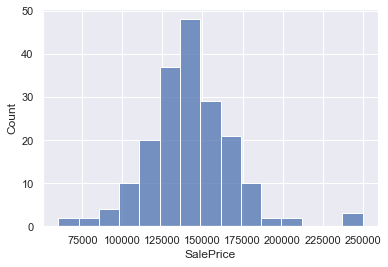

In [14]:
Saleplot = sns.histplot(df1_Pave['SalePrice'], kde = False, bins=15)

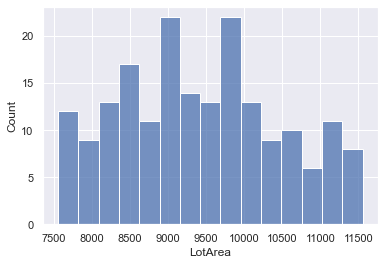

In [15]:
Areaplot = sns.histplot(df1_Pave['LotArea'], kde = False, bins=15)

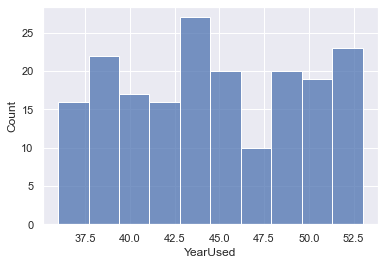

In [16]:
Yearplot = sns.histplot(df1_Pave['YearUsed'], kde = False, bins=10)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = np.array(df1_Pave['YearUsed']).reshape(-1, 1)
y = np.array(df1_Pave['SalePrice']).reshape(-1, 1)
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

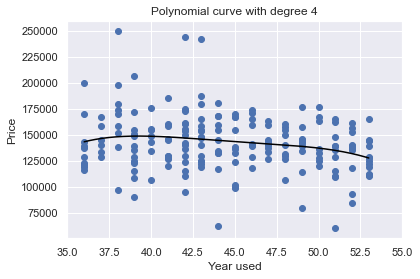

In [18]:
degree = 4
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial curve with degree "+str(degree))
plt.xlabel('Year used')
plt.ylabel('Price')
plt.xlim(35,55)
plt.show()